# Obesity Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [7]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


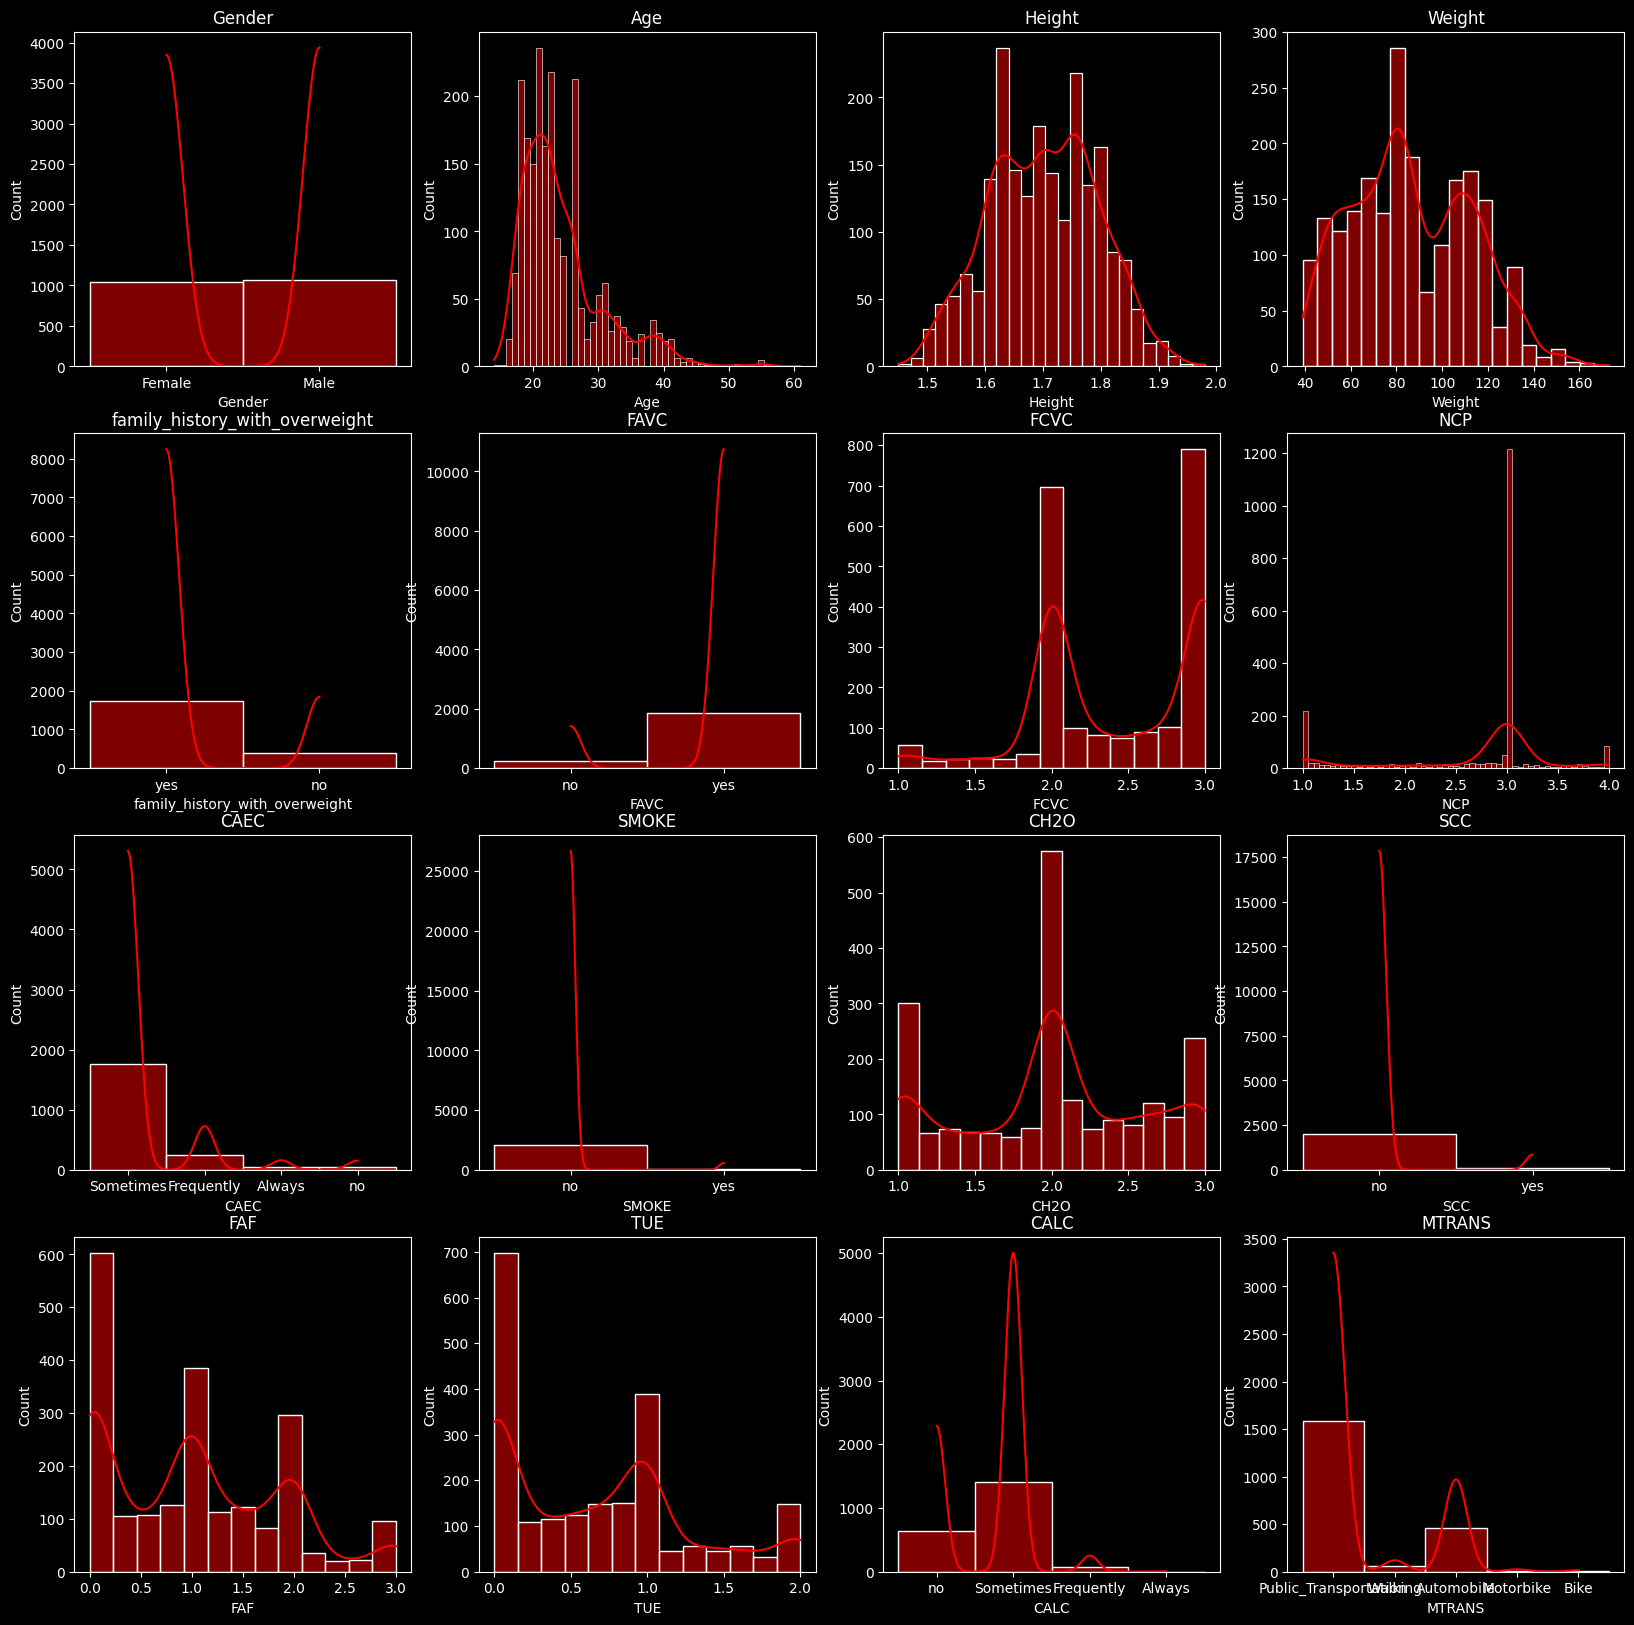

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

axes = axes.flatten()

for ax, col in zip(axes, df.columns):
  sns.histplot(df[col], kde=True, ax=ax, color='red')
  ax.set_title(col)

In [11]:
for col in df.columns:
  print(f"Unique of {col}", df[col].unique())

Unique of Gender ['Female' 'Male']
Unique of Age [21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]
Unique of Height [1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77 1.7  1.93 1.53 1.71
 1.69 1.6  1.75 1.68 1.58 1.79 1.56 1.67 1.66 1.81 1.82 1.55 1.61 1.63
 1.76 1.57 1.88 1.87 1.89 1.74 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.86 1.45 1.98 1.51 1.46 1.49 1.95 1.94]
Unique of Weight [ 64.    56.    77.   ... 131.41 133.69 133.35]
Unique of family_history_with_overweight ['yes' 'no']
Unique of FAVC ['no' 'yes']
Unique of FCVC [2.   3.   1.   2.45 2.88 2.01 2.6  2.59 2.39 1.12 2.03 2.66 2.89 2.71
 2.75 1.49 2.21 2.06 2.31 2.82 2.05 2.77 2.74 2.57 2.52 2.97 1.08 1.27
 1.34 2.96 2.73 2.84 2.44 2.43 2.93 2.02 1.03 1.59 1.21 1.52 2.7  2.36
 2.14 2.56 2.34 1.81 2.72 1.13 1.76 2.98 2.2  2.53 2.24 2.65 2.9  2.48
 2.95 2.78 1.01 2.94 1.89 1.95 2.28 2.37 2.32 2.62 1.05 2.76 2.07 2.69
 2.79 2.67 1.14 2.19 2.92 2.85 2.5

In [14]:
df.isna().sum(), df.dtypes

(Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 NObeyesdad                        0
 dtype: int64,
 Gender                             object
 Age                                 int64
 Height                            float64
 Weight                            float64
 family_history_with_overweight     object
 FAVC                               object
 FCVC                              float64
 NCP                               float64
 CAEC       

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_eda = df

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in categorical_features:
    df_eda[col] = le.fit_transform(df_eda[col])

df_train = pd.get_dummies(df, columns=categorical_features)

<Axes: >

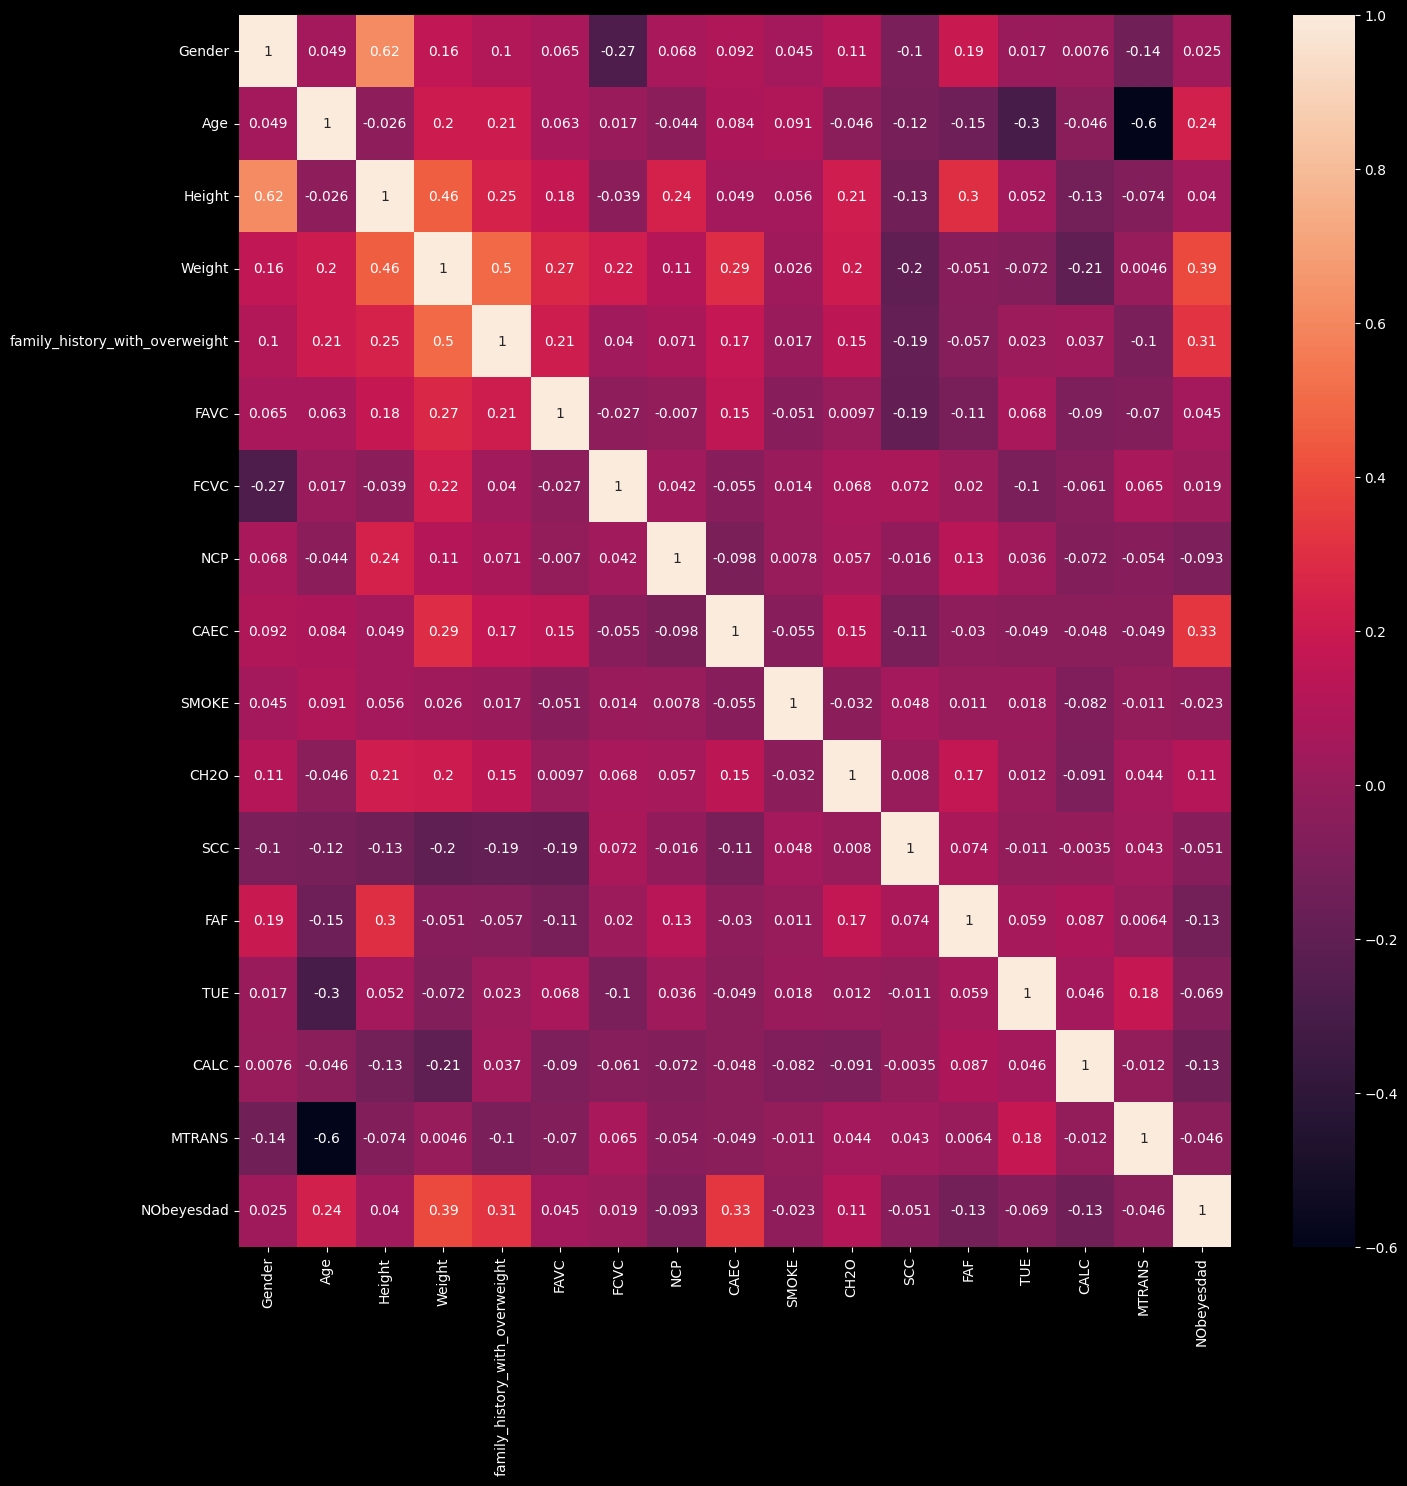

In [24]:
plt.figure(figsize=(16,16))

sns.heatmap(df_eda.corr(), annot=True)

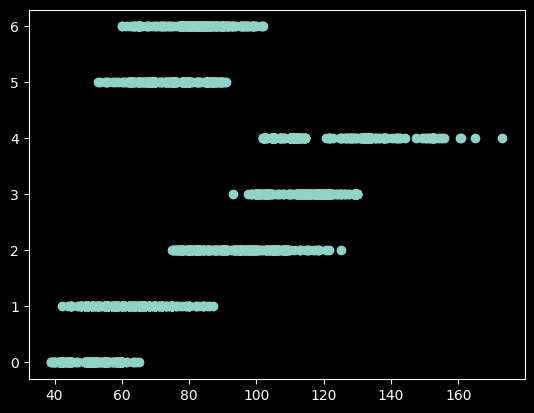

In [25]:
plt.scatter(df_eda['Weight'], df_eda['NObeyesdad'])

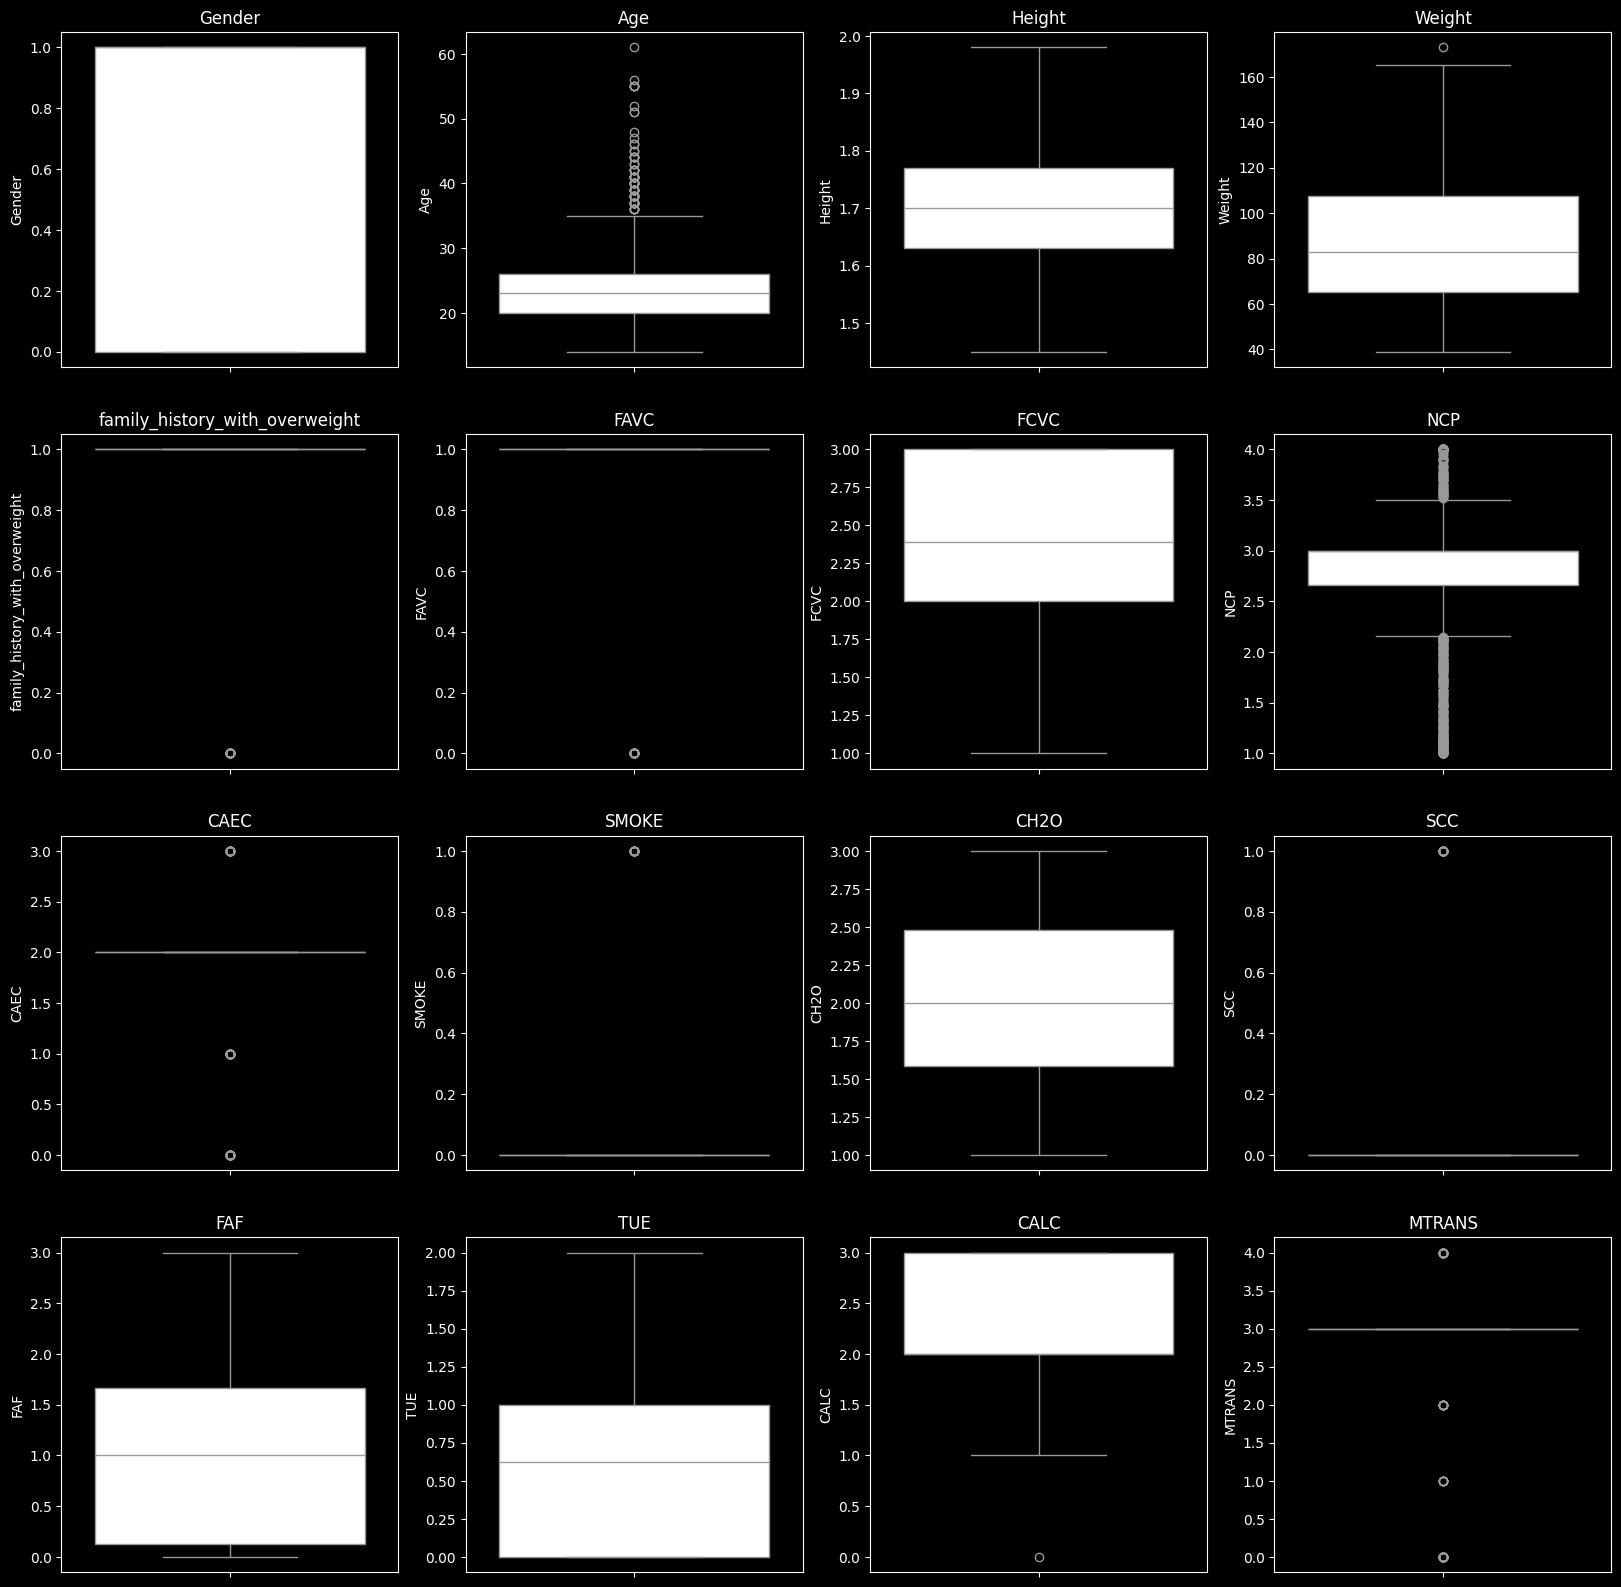

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))

axes = axes.flatten()

for ax, col in zip(axes, df_eda.columns):
  sns.boxplot(df_eda[col], ax=ax, color='White')
  ax.set_title(col)

In [29]:
df_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_0,Gender_1,...,MTRANS_2,MTRANS_3,MTRANS_4,NObeyesdad_0,NObeyesdad_1,NObeyesdad_2,NObeyesdad_3,NObeyesdad_4,NObeyesdad_5,NObeyesdad_6
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,True,False,False,True,False,False,False,False,False
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,False,True,False,False,True,False,False,False,False,False
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,True,False,False,True,False,False,False,False,False
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,False,True,False,False,False,False,False,True,False
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,True,False,False,False,False,False,False,False,True


In [31]:
df = pd.read_csv(r'C:\Users\Saidabrorkhon\ML_Lectures\ObesityDataSet_raw_and_data_sinthetic.csv')


categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

df_train = pd.get_dummies(df, columns= categorical_features)

In [32]:
df_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False


In [33]:
df_train['NObeyesdad'] = le.fit_transform(df_train['NObeyesdad'])
df_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.00,2.0,3.0,2.00,0.00,1.000,1,True,...,False,False,False,False,True,False,False,False,True,False
1,21,1.52,56.00,3.0,3.0,3.00,3.00,0.000,1,True,...,True,False,False,True,False,False,False,False,True,False
2,23,1.80,77.00,2.0,3.0,2.00,2.00,1.000,1,False,...,False,False,True,False,False,False,False,False,True,False
3,27,1.80,87.00,3.0,3.0,2.00,2.00,0.000,5,False,...,False,False,True,False,False,False,False,False,False,True
4,22,1.78,89.80,2.0,1.0,2.00,0.00,0.000,6,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1.71,131.41,3.0,3.0,1.73,1.68,0.906,4,True,...,False,False,False,True,False,False,False,False,True,False
2107,22,1.75,133.74,3.0,3.0,2.01,1.34,0.599,4,True,...,False,False,False,True,False,False,False,False,True,False
2108,23,1.75,133.69,3.0,3.0,2.05,1.41,0.646,4,True,...,False,False,False,True,False,False,False,False,True,False
2109,24,1.74,133.35,3.0,3.0,2.85,1.14,0.586,4,True,...,False,False,False,True,False,False,False,False,True,False


In [42]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
x = df_train.drop(['NObeyesdad'], axis = 1)
y = df_train['NObeyesdad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
  "LinearRegression": LogisticRegression(C = 1.0, solver='liblinear', max_iter=500),
  "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, criterion="gini", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, min_samples_split=5),
    "SGD Classifier": SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0001, max_iter=1000, tol=1e-3),
    
}

results = []
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')

  results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)


In [43]:
results_df

,Model,Accuracy,F1 Score
3,Gradient Boosting,0.952719,0.952375
2,Decision Tree,0.931442,0.931201
1,Random Forest,0.931442,0.931631
0,LinearRegression,0.723404,0.710731
4,SGD Classifier,0.470449,0.372961


In [45]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64